### Importations des packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()
import numpy as np

### Lecture du fichier

In [2]:
df = pd.read_csv('south1.csv')
df

,Datetime,precip_totl_tp,prsn_atmos_max_tp_prcedt,prsn_atmos_min_prmier_tmp,rad_gobal,tmp_air,tmp_pt_rose,humid_rlative_air,vent_vitess_tmp,station
0,2018-11-01 23:00:00,0.0,901.5,901.2,NaN,15.3,14.6,96.0,0.1,GENERAL CARNEIRO
1,2018-11-02 00:00:00,0.0,901.8,901.5,NaN,14.2,13.6,96.0,0.2,GENERAL CARNEIRO
2,2018-11-02 01:00:00,0.0,901.9,901.7,NaN,13.7,13.2,97.0,0.0,GENERAL CARNEIRO
3,2018-11-02 02:00:00,0.0,901.7,901.3,NaN,12.3,11.8,97.0,0.0,GENERAL CARNEIRO
4,2018-11-02 03:00:00,0.2,901.4,900.9,NaN,13.1,12.7,97.0,0.0,GENERAL CARNEIRO
...,...,...,...,...,...,...,...,...,...,...
2435369,2020-09-11 03:00:00,0.0,1018.2,1017.6,NaN,17.3,NaN,NaN,1.1,ARARANGUA
2435370,2020-09-11 04:00:00,0.0,1017.6,1016.5,NaN,17.2,NaN,NaN,1.4,ARARANGUA
2435371,2020-09-11 05:00:00,0.0,1016.5,1015.7,NaN,17.0,NaN,NaN,1.4,ARARANGUA
2435372,2020-09-11 06:00:00,0.0,1016.0,1015.4,NaN,16.4,NaN,NaN,1.3,ARARANGUA


### Conversion de la date en datetime

In [3]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.dtypes

Datetime                     datetime64[ns]
precip_totl_tp                      float64
prsn_atmos_max_tp_prcedt            float64
prsn_atmos_min_prmier_tmp           float64
rad_gobal                           float64
tmp_air                             float64
tmp_pt_rose                         float64
humid_rlative_air                   float64
vent_vitess_tmp                     float64
station                              object
dtype: object

### Confimation de l'interval de temps

In [4]:
print(pd.date_range(start='2018-11-01',end='2020-09-11', freq="1h").difference(df.index))

DatetimeIndex(['2018-11-01 00:00:00', '2018-11-01 01:00:00',
               '2018-11-01 02:00:00', '2018-11-01 03:00:00',
               '2018-11-01 04:00:00', '2018-11-01 05:00:00',
               '2018-11-01 06:00:00', '2018-11-01 07:00:00',
               '2018-11-01 08:00:00', '2018-11-01 09:00:00',
               ...
               '2020-09-10 15:00:00', '2020-09-10 16:00:00',
               '2020-09-10 17:00:00', '2020-09-10 18:00:00',
               '2020-09-10 19:00:00', '2020-09-10 20:00:00',
               '2020-09-10 21:00:00', '2020-09-10 22:00:00',
               '2020-09-10 23:00:00', '2020-09-11 00:00:00'],
              dtype='datetime64[ns]', length=16321, freq='H')


### Verification des valeurs manquantes avant remplacement

In [5]:
df.isnull().sum().sum()

2988493

In [6]:
df.isnull().sum()

Datetime                           0
precip_totl_tp                261130
prsn_atmos_max_tp_prcedt      208944
prsn_atmos_min_prmier_tmp     208943
rad_gobal                    1217282
tmp_air                       208190
tmp_pt_rose                   298808
humid_rlative_air             304319
vent_vitess_tmp               280877
station                            0
dtype: int64

### Correlation entre toutes les variables

<AxesSubplot:title={'center':'Correlation'}>

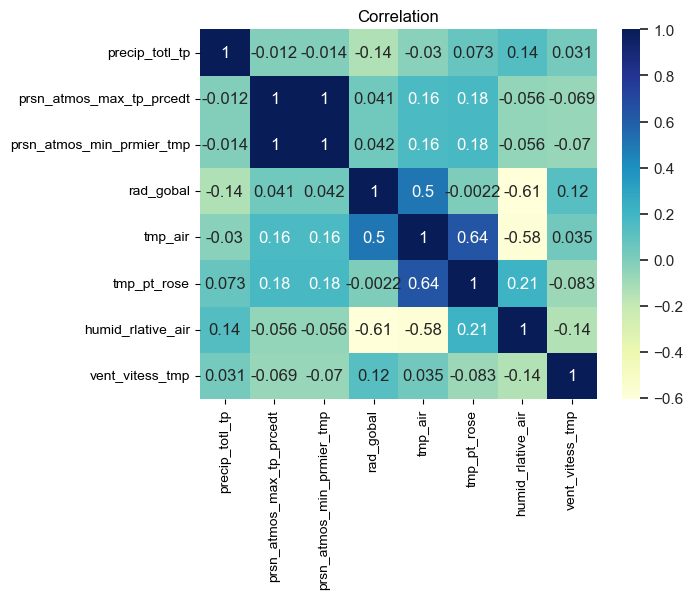

In [7]:
quantitatives = df[['precip_totl_tp', 'prsn_atmos_max_tp_prcedt', 'prsn_atmos_min_prmier_tmp', 'rad_gobal', 'tmp_air', 'tmp_pt_rose', 'humid_rlative_air','vent_vitess_tmp']]

corrQuant = quantitatives.corr()
ax = plt.axes()
ax.set_title("Correlation")
#sns.heatmap(corrQuant, xticklabels=corrQuant.columns.values, yticklabels=corrQuant.columns.values, annot=True)

#corr = new_Data.corr()
sns.set(rc={'figure.figsize':(12,6)})
sns.heatmap(corrQuant, cmap="YlGnBu", annot=True)

# Detection des valeurs aberrantes 

### Description des données

In [8]:
df.describe()

,precip_totl_tp,prsn_atmos_max_tp_prcedt,prsn_atmos_min_prmier_tmp,rad_gobal,tmp_air,tmp_pt_rose,humid_rlative_air,vent_vitess_tmp
count,2.174244e+06,2.226430e+06,2.226431e+06,1.218092e+06,2.227184e+06,2.136566e+06,2.131055e+06,2.154497e+06
mean,1.715186e-01,9.594115e+02,9.588491e+02,1.254992e+03,1.909656e+01,1.416954e+01,7.602498e+01,2.341519e+00
std,1.200446e+00,4.304169e+01,4.299300e+01,1.120796e+03,6.023745e+00,5.100885e+00,1.849480e+01,2.012077e+00
min,0.000000e+00,8.041000e+02,8.018000e+02,0.000000e+00,-8.400000e+00,-3.600000e+01,7.000000e+00,0.000000e+00
25%,0.000000e+00,9.240000e+02,9.235000e+02,2.200000e+02,1.520000e+01,1.130000e+01,6.400000e+01,8.000000e-01
50%,0.000000e+00,9.615000e+02,9.609000e+02,9.780000e+02,1.920000e+01,1.480000e+01,8.000000e+01,2.000000e+00
75%,0.000000e+00,1.001700e+03,1.001000e+03,2.122000e+03,2.310000e+01,1.780000e+01,9.200000e+01,3.400000e+00
max,7.660000e+01,1.038800e+03,1.037300e+03,6.890000e+03,4.440000e+01,3.980000e+01,1.000000e+02,2.910000e+01


In [12]:
def boxplot(dataset) :
    plt.figure(figsize = (16,6))
    sns.boxplot(data = dataset)
    plt.grid()

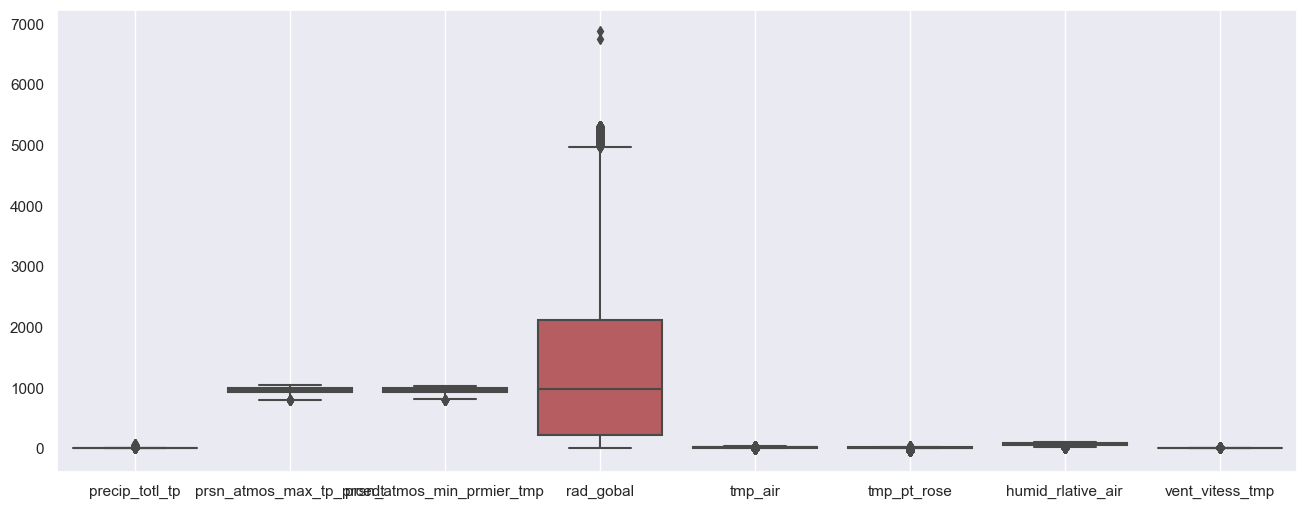

In [13]:
boxplot(df)

### Comment les remplacer

In [15]:
df.columns

Index(['Datetime', 'precip_totl_tp', 'prsn_atmos_max_tp_prcedt',
       'prsn_atmos_min_prmier_tmp', 'rad_gobal', 'tmp_air', 'tmp_pt_rose',
       'humid_rlative_air', 'vent_vitess_tmp', 'station'],
      dtype='object')

In [16]:
outlers_features = ['precip_totl_tp', 'prsn_atmos_max_tp_prcedt', 'prsn_atmos_min_prmier_tmp', 'rad_gobal', 'tmp_air', 'tmp_pt_rose',
       'humid_rlative_air', 'vent_vitess_tmp']

def impute_outlers(dataset, outlers_features) :
    quantile1 = np.percentile(dataset[outlers_features], 25)
    quantile3 = np.percentile(dataset[outlers_features], 75)
    iqr = quantile3 - quantile1
    limit_lower_bound = quantile1 - 1.5*iqr
    limit_upper_bound = quantile3 - 1.5*iqr
    
    dataset.loc[dataset[[outlers_features]] < limit_lower_bound, outlers_features] = limit_lower_bound
    
    dataset.loc[dataset[[outlers_features]] > limit_upper_bound, outlers_features] = limit_upper_bound

In [ ]:
for outler_feature in outlers_features :
    impute_outlers(data1, outlers_features)

### Traitement des valeurs manquantes

In [9]:
df1 = df


In [10]:
df1[ 'precip_totl_tp'].fillna(method = 'ffill', inplace = True)
df1[ 'prsn_atmos_max_tp_prcedt'].fillna(method = 'ffill', inplace = True)
df1[ 'prsn_atmos_min_prmier_tmp'].fillna(method = 'ffill', inplace = True)
df1[ 'rad_gobal'].fillna(method = 'ffill', inplace = True)
df1[ 'tmp_air'].fillna(method = 'ffill', inplace = True)
df1[ 'tmp_pt_rose'].fillna(method = 'ffill', inplace = True)
df1[ 'humid_rlative_air'].fillna(method = 'ffill', inplace = True)
df1[ 'vent_vitess_tmp'].fillna(method = 'ffill', inplace = True)

In [11]:
df1.isnull().sum()

Datetime                      0
precip_totl_tp                0
prsn_atmos_max_tp_prcedt      0
prsn_atmos_min_prmier_tmp     0
rad_gobal                    10
tmp_air                       0
tmp_pt_rose                   0
humid_rlative_air             0
vent_vitess_tmp               0
station                       0
dtype: int64

In [12]:
df1['rad_gobal'].fillna(method = 'bfill', inplace = True)

In [13]:
df1.isnull().sum()

Datetime                     0
precip_totl_tp               0
prsn_atmos_max_tp_prcedt     0
prsn_atmos_min_prmier_tmp    0
rad_gobal                    0
tmp_air                      0
tmp_pt_rose                  0
humid_rlative_air            0
vent_vitess_tmp              0
station                      0
dtype: int64

# Applications de quelques models qui sont adaptés aux series temporelles  

### Model ARIMA
Arima est un model univarié raison pour laquelle j'ai choisi une colonne qui est la temperature de l'aire

### Importation des bibliothèques utilusées pour le model

In [14]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA


In [ ]:
data2.to_csv("south1_2.csv")

In [15]:
df2 = pd.read_csv('south1_2.csv', parse_dates = ['Datetime'], index_col= 'Datetime', usecols=['Datetime', 'tmp_air'])
df3 = df2.iloc[:1000]
df3

,tmp_air
Datetime,
2018-11-01 23:00:00,15.3
2018-11-02 00:00:00,14.2
2018-11-02 01:00:00,13.7
2018-11-02 02:00:00,12.3
2018-11-02 03:00:00,13.1
...,...
2018-12-13 10:00:00,16.8
2018-12-13 11:00:00,20.4
2018-12-13 12:00:00,23.6


### plot du dataframe

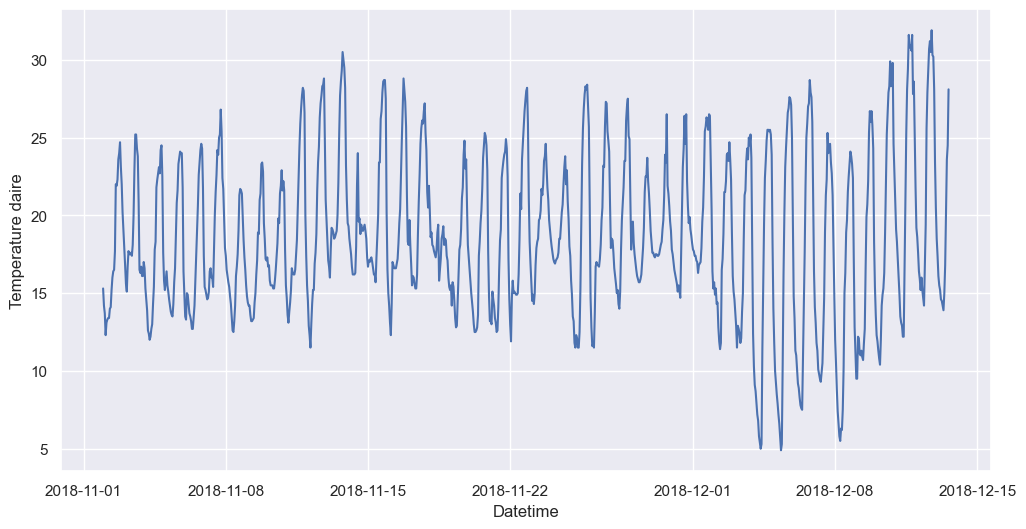

In [31]:
plt.xlabel('Datetime')
plt.ylabel('Temperature daire')
plt.plot(df3)

### Verification de la stationnarité des données avant d'appliquer le model
on remarque que les données ne sont pas stationnaires car le p-value est superieur à 0,05 or que le p-valeur doit etre inferieur ou egal à 0,05 malgré que ADF est proche des valeurs critiques

In [16]:
result = adfuller(df3['tmp_air'])
 
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -2.0088713742313318
p-value : 0.2826969088542043
Valeurs Critiques :
	1%: -3.43706091543889
	5%: -2.8645028204932483
	10%: -2.568347558984588


### Rendre la série chronologique stationnaire
on remarque que la serie chronologique est stationnaire maintenant car le p-value est inferieur à 0,05 car il est egal à 6,48 puisssance -24.

In [17]:
result = adfuller(df3['tmp_air'].diff()[1:])
 
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -12.809826077879672
p-value : 6.482322551454655e-24
Valeurs Critiques :
	1%: -3.4370678095881804
	5%: -2.8645058608075264
	10%: -2.568349178354273


### Comment choisir les parametres de ARIMA
on voit que le model à (2,0,3) comme meilleur parametre

In [18]:
from pmdarima import auto_arima
#ignore harless warnings
import warnings

warnings.filterwarnings("ignore")

In [38]:
stepwise_fit = auto_arima(df3['tmp_air'], trace = True, suppress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3280.804, Time=3.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=6135.142, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3883.006, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5020.665, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8761.731, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3477.335, Time=1.48 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3288.626, Time=1.18 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=3290.567, Time=2.96 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=3280.085, Time=2.37 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=3418.511, Time=1.00 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=3284.291, Time=3.43 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=3282.078, Time=2.90 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=3396.636, Time=1.25 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=3282.838, Time=4.03 sec
 ARIMA(2,0,3)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(2, 0, 3)   Log Likelihood               -1633.043
Date:                Thu, 09 Feb 2023   AIC                           3280.085
Time:                        23:15:31   BIC                           3314.439
Sample:                    11-01-2018   HQIC                          3293.142
                         - 12-13-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1872      0.095     12.452      0.000       1.000       1.374
ar.L1          1.8457      0.022     82.532      0.000       1.802       1.890
ar.L2         -0.9094      0.020    -45.704      0.000      -0.948      -0.870
ma.L1         -0.5150      0.035    -14.911      0.000      -0.583      -0.447
ma.L2         -0.0674      0.034     -1.966      0.049      -0.135      -0.000
ma.L3         -0.0517      0.039     -1.333      0.183      -0.128       0.024
sigma2         1.5288      0.052     29.554      0.000       1.427       1.630
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               268.83
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.64   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Split des données d'entrainement et test

In [39]:
print(df3.shape) 
train = df3.iloc[0:800]
test = df3.iloc[800:]
print(train.shape, test.shape)

(1000, 1)
(800, 1) (200, 1)


### Entrainement du model

In [41]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train, order = (2,0,3))

model_fit = model_arima.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                tmp_air   No. Observations:                  800
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -1273.373
Date:                Thu, 09 Feb 2023   AIC                           2560.746
Time:                        23:19:58   BIC                           2593.538
Sample:                    11-01-2018   HQIC                          2573.343
                         - 12-05-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.6555      0.227     82.018      0.000      18.210      19.101
ar.L1          1.8400      0.024     75.187      0.000       1.792       1.888
ar.L2         -0.9042      0.022    -41.373      0.0

### Faire la prediction sur le test

In [42]:
start = len(train)
end = len(train) + len(test) - 1
pred = model_fit.predict(start = start, end = end, typ = 'levels')
print(model_fit)

<AxesSubplot:xlabel='Datetime'>

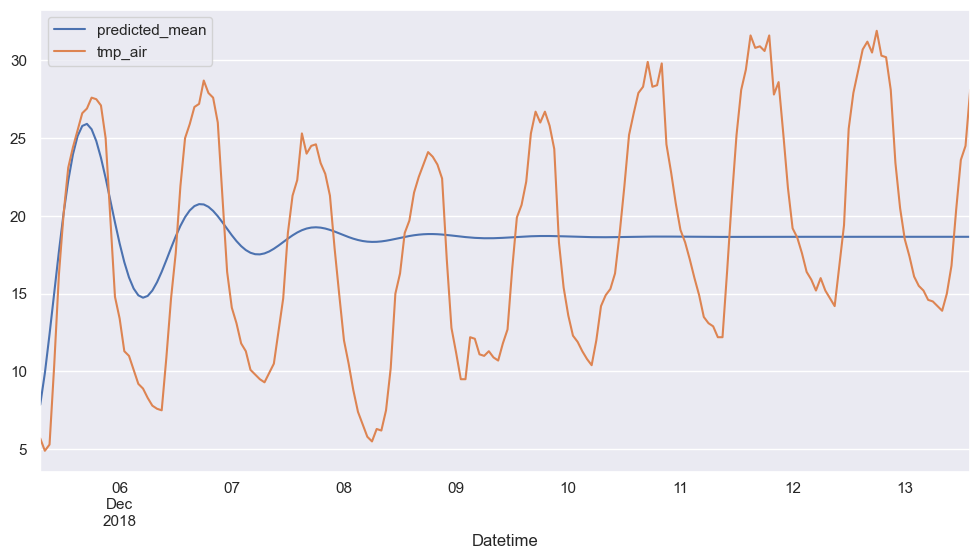

In [43]:
pred.plot(legend = True)
test['tmp_air'].plot(legend = True)

### Les metrics utilisés en serie temporelle

In [45]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred, test['tmp_air']))
corr = np.corrcoef(pred, test['tmp_air'])[0,1]   # corr
mins = np.amin(np.hstack([pred[:,None], test['tmp_air'][:,None]]), axis=1)
maxs = np.amax(np.hstack([pred[:,None], test['tmp_air'][:,None]]), axis=1)
minmax = 1 - np.mean(mins/maxs) 
mape = np.mean(np.abs(pred - test['tmp_air'])/np.abs(test['tmp_air']))
print(rmse)
print(corr)
print(minmax)
print(mape)


6.4947741518215745
0.48552932611776956
0.26114270314897337
0.3857999894070406


In [47]:
test

,tmp_air
Datetime,
2018-12-05 07:00:00,5.7
2018-12-05 08:00:00,4.9
2018-12-05 09:00:00,5.3
2018-12-05 10:00:00,10.4
2018-12-05 11:00:00,16.2
...,...
2018-12-13 10:00:00,16.8
2018-12-13 11:00:00,20.4
2018-12-13 12:00:00,23.6


### Model VAR
Ce model est un model multivarié et aprtire de la matrice de correlation on peur voir que les colonnes qui sont proches de la colonne cibles tmp_aire est tmp_pt_rose et rad_global

### Importation du model

In [48]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.vector_ar.vecm import coint_johansen

### Tester la causabilité

In [19]:
df4 = pd.read_csv('south1_2.csv', parse_dates = ['Datetime'], index_col= 'Datetime', usecols=['Datetime',  'rad_gobal', 'tmp_air', 'tmp_pt_rose'])
df5 = df4.iloc[:1000]
df5

,rad_gobal,tmp_air,tmp_pt_rose
Datetime,,,
2018-11-01 23:00:00,6.0,15.3,14.6
2018-11-02 00:00:00,6.0,14.2,13.6
2018-11-02 01:00:00,6.0,13.7,13.2
2018-11-02 02:00:00,6.0,12.3,11.8
2018-11-02 03:00:00,6.0,13.1,12.7
...,...,...,...
2018-12-13 10:00:00,305.0,16.8,16.2
2018-12-13 11:00:00,793.0,20.4,17.9
2018-12-13 12:00:00,1235.0,23.6,18.9


### Tester la causabilité

In [55]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df5 = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df5.columns:
        for r in df5.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df5.loc[r, c] = min_p_value
    df5.columns = [var + '_x' for var in variables]
    df5.index = [var + '_y' for var in variables]
    return df5

grangers_causation_matrix(df5, variables = df5.columns)  

,rad_gobal_x,tmp_air_x,tmp_pt_rose_x
rad_gobal_y,1.0,0.0,0.0
tmp_air_y,0.0,1.0,0.0
tmp_pt_rose_y,0.0,0.0,1.0


### Test de cointégration

In [57]:
def cointegration_test(df5, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df5,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df5.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df5)


Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
rad_gobal ::  267.62    > 24.2761   =>   True
tmp_air ::  81.67     > 12.3212   =>   True
tmp_pt_rose ::  0.51      > 4.1296    =>   False


### Divisez la série en données d'entrainement et de test

In [60]:
nobs = 4
df_train, df_test = df5[0:-nobs], df5[-nobs:]

# Check size
print(df_train.shape)  
print(df_test.shape)  

(996, 3)
(4, 3)


### Vérifier la stationnarité et rendre la série chronologique stationnaire

In [61]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [62]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "rad_gobal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.0082
 No. Lags Chosen       = 22
 Critical value 1%     = -3.437
 Critical value 5%     = -2.865
 Critical value 10%    = -2.568
 => P-Value = 0.0341. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "tmp_air" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.0899
 No. Lags Chosen       = 22
 Critical value 1%     = -3.437
 Critical value 5%     = -2.865
 Critical value 10%    = -2.568
 => P-Value = 0.2486. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "tmp_pt_rose" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. N

In [65]:
# 1st difference
df_differenced = df5.diff().dropna()
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "rad_gobal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -15.3041
 No. Lags Chosen       = 22
 Critical value 1%     = -3.437
 Critical value 5%     = -2.865
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "tmp_air" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.8098
 No. Lags Chosen       = 22
 Critical value 1%     = -3.437
 Critical value 5%     = -2.865
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "tmp_pt_rose" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significan

### Comment sélectionner l'ordre (P) du modèle VAR

In [66]:
model = VAR(df_differenced)
for i in range(1,9):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  12.456636727652011
BIC :  12.515623740994434
FPE :  256950.01644581792
HQIC:  12.479058087307468 

Lag Order = 2
AIC :  12.331532078444276
BIC :  12.434841773699238
FPE :  226733.99262695227
HQIC:  12.37080269736797 

Lag Order = 3
AIC :  12.277109997265027
BIC :  12.424813227915164
FPE :  214724.70001785952
HQIC:  12.333258451782951 

Lag Order = 4
AIC :  12.24104832707811
BIC :  12.433216132856185
FPE :  207119.8288535503
HQIC:  12.314103270595027 

Lag Order = 5
AIC :  12.172754813419246
BIC :  12.40945842098415
FPE :  193447.8325656265
HQIC:  12.2627449767025 

Lag Order = 6
AIC :  12.129114322356454
BIC :  12.41042514597234
FPE :  185188.28358136292
HQIC:  12.2360685138211 

Lag Order = 7
AIC :  12.11187132970409
BIC :  12.43786097192264
FPE :  182023.87732299994
HQIC:  12.235818435699361 

Lag Order = 8
AIC :  12.090410325365335
BIC :  12.461150577711196
FPE :  178160.91661216997
HQIC:  12.231379310462438 



#### Former le model

In [67]:
model_fitted = model.fit(8)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 09, Feb, 2023
Time:                     23:58:31
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    12.4612
Nobs:                     991.000    HQIC:                   12.2314
Log likelihood:          -10134.3    FPE:                    178161.
AIC:                      12.0904    Det(Omega_mle):         165330.
--------------------------------------------------------------------
Results for equation rad_gobal
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  1.393636        12.771057            0.109           0.913
L1.rad_gobal           0.196071         0.039577            4.954           0.000
L1.tmp_air            23.945802        13.325278    

### Prediction

In [70]:
lag_order = model_fitted.k_ar
print(lag_order)  #> 4


forecast_input = df_differenced.values[-lag_order:]
forecast_input

8


array([[ 0.000e+00, -3.000e-01, -2.000e-01],
       [ 0.000e+00, -3.000e-01, -3.000e-01],
       [-1.330e+02,  1.100e+00,  1.100e+00],
       [ 2.580e+02,  1.800e+00,  1.700e+00],
       [ 4.880e+02,  3.600e+00,  1.700e+00],
       [ 4.420e+02,  3.200e+00,  1.000e+00],
       [ 7.150e+02,  9.000e-01, -6.000e-01],
       [ 1.171e+03,  3.600e+00, -4.000e-01]])

In [73]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df5.index[-nobs:], columns=df5.columns + '_2d')
df_forecast

,rad_gobal_2d,tmp_air_2d,tmp_pt_rose_2d
Datetime,,,
2018-12-13 11:00:00,467.574358,1.953893,-0.281066
2018-12-13 12:00:00,351.609215,1.705325,-0.244630
2018-12-13 13:00:00,27.411160,1.108923,-0.721619
2018-12-13 14:00:00,-246.499246,0.649550,-0.125160


In [74]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [75]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)

print(df_results)
df_results.loc[:, ['rad_gobal_2d', 'tmp_air_forecast', 'tmp_pt_rose_2d']]

                     rad_gobal_2d  tmp_air_2d  tmp_pt_rose_2d  rad_gobal_1d  \
Datetime                                                                      
2018-12-13 11:00:00    467.574358    1.953893       -0.281066    725.574358   
2018-12-13 12:00:00    351.609215    1.705325       -0.244630   1077.183573   
2018-12-13 13:00:00     27.411160    1.108923       -0.721619   1104.594733   
2018-12-13 14:00:00   -246.499246    0.649550       -0.125160    858.095486   

                     rad_gobal_forecast  tmp_air_1d  tmp_air_forecast  \
Datetime                                                                
2018-12-13 11:00:00         1030.574358    3.753893         20.553893   
2018-12-13 12:00:00         2107.757931    5.459218         26.013111   
2018-12-13 13:00:00         3212.352664    6.568141         32.581252   
2018-12-13 14:00:00         4070.448150    7.217692         39.798944   

                     tmp_pt_rose_1d  tmp_pt_rose_forecast  
Datetime                  

,rad_gobal_2d,tmp_air_forecast,tmp_pt_rose_2d
Datetime,,,
2018-12-13 11:00:00,467.574358,20.553893,-0.281066
2018-12-13 12:00:00,351.609215,26.013111,-0.244630
2018-12-13 13:00:00,27.411160,32.581252,-0.721619
2018-12-13 14:00:00,-246.499246,39.798944,-0.125160


In [77]:
df['station'].unique

<bound method Series.unique of 0          GENERAL CARNEIRO
1          GENERAL CARNEIRO
2          GENERAL CARNEIRO
3          GENERAL CARNEIRO
4          GENERAL CARNEIRO
                 ...       
2435369           ARARANGUA
2435370           ARARANGUA
2435371           ARARANGUA
2435372           ARARANGUA
2435373           ARARANGUA
Name: station, Length: 2435374, dtype: object>